In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/admission (1).csv")

print(data.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [ ]:

print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predict on the testing data
y_pred = regressor.predict(X_test)

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.006415999999999998
R^2 Score: 0.6257100337829364


In [ ]:
!pip install pydotplus

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image
from six import StringIO

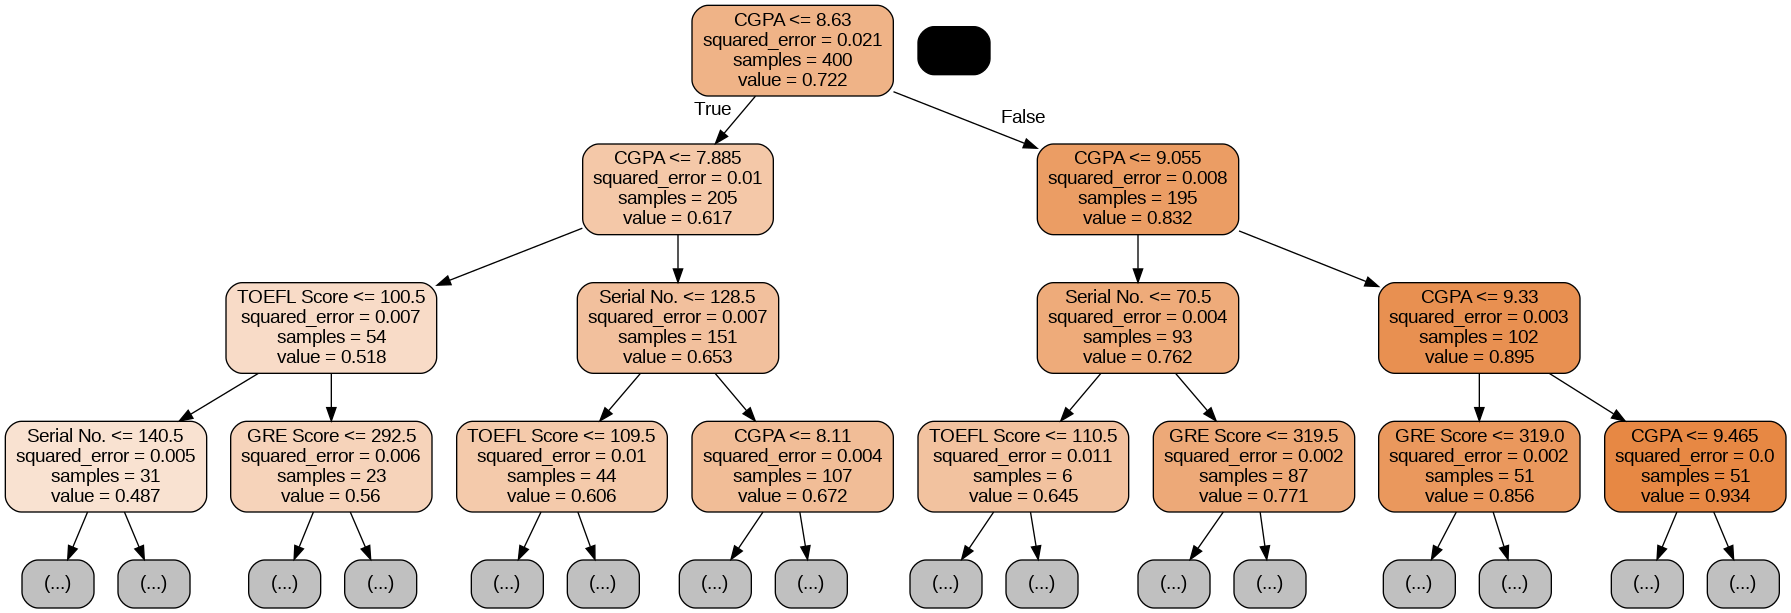

In [ ]:
from IPython.display import Image
# Export the decision tree as a dot file
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, max_depth=3)  # Adjust max_depth as needed

# Convert dot data to a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the decision tree as an image file
graph.write_png('decision_tree.png')

# Display the decision tree
Image(graph.create_png())

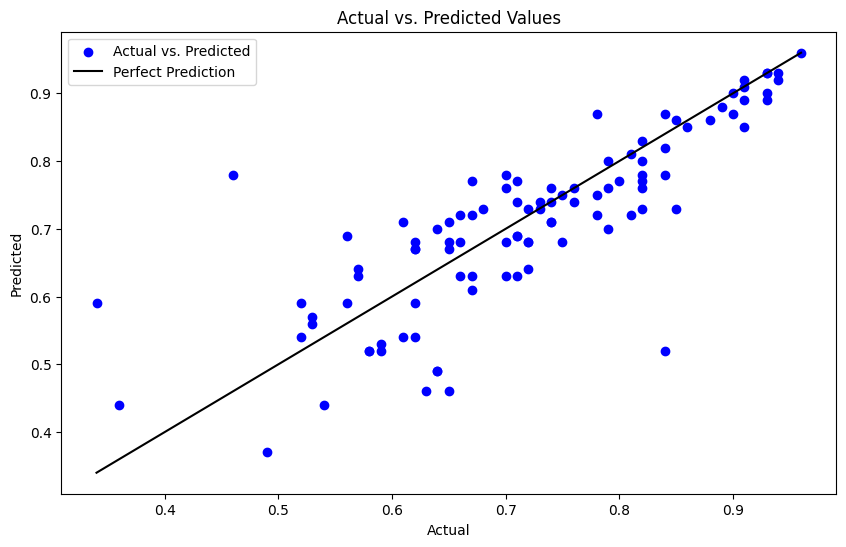

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', label='Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()